# Run this in the SEED EEG File

In [1]:
import os
import numpy as np 
import pickle
from ipynb.fs.full.get_extracted_data import getDE_data
from ipynb.fs.full.LabelTesting import makeOutThreeArr
import tensorflow as tf

### getting the DE data provided to us/ data prepping

In [2]:
DE_x = getDE_data()
label=DE_x[:, 310]
DE_x=np.delete(DE_x, 310, 1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DE_x, label, test_size=0.1)

## function for visualizing the loses

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

## making the y_train into the size 3 array approach

In [10]:
y_trainNN=makeOutThreeArr(y_train)

## defining model (can be better)

In [11]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(310,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                  metrics=['accuracy'])

## model traning, will take a bit (make sure laptop is plugged in)

In [12]:
history = nn_model.fit(
    X_train, y_trainNN, epochs=500, batch_size=50, validation_split=0.2, verbose=0
  )

## training visualization

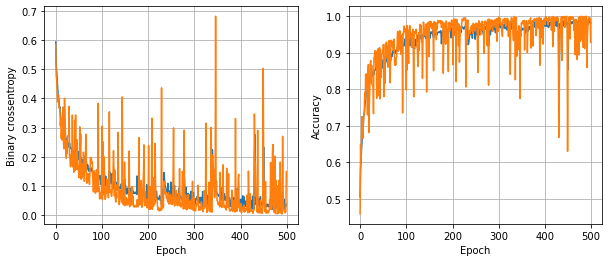

In [13]:
plot_history(history)

## testing model

In [18]:
nn_model.predict(X_test)

160/160 [==============================] - 0s 802us/step


array([[7.34084249e-01, 4.80782717e-01, 4.49633924e-03],
       [6.95823668e-30, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 9.64948681e-19],
       ...,
       [1.65193703e-09, 1.14054575e-17, 1.00000000e+00],
       [9.98855650e-01, 2.55242223e-03, 2.85841757e-04],
       [3.74211726e-04, 4.53654910e-03, 9.94521499e-01]], dtype=float32)

In [19]:
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

160/160 [==============================] - 0s 679us/step


In [24]:
y_test=makeOutThreeArr(y_test).astype(int)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1736
           1       0.98      0.81      0.89      1630
           2       0.85      0.97      0.91      1724

   micro avg       0.92      0.92      0.92      5090
   macro avg       0.93      0.92      0.92      5090
weighted avg       0.93      0.92      0.92      5090
 samples avg       0.92      0.92      0.92      5090



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
y_pred

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])